# Learning Outcomes
1. Geometric Transformations
    - Rotation
    - Translation
    - Affline Transformation
    - Perspective transformation

2. Drawing functions (line, circle, elipse, rectangle, text)

3. Bitwise operations (OR, AND, NOT, XOR)

4. Convolutions:
    - Image smoothing
    - Edge Detection
    - Sharpening
    - Cornerstone of CNN training

## Setup

In [1]:
import sys
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv
from util_func import *

## Geometric Transformation

### Translation

In [2]:
img = cv.imread('images/lena.jfif')

# define M (must be a float)
h, w = img.shape[:2]
tx = 50
ty = 100
M = np.float32([[1, 0, tx], [0, 1, ty]])

# dimension in CV start with W first
dst = cv.warpAffine(img, M, (w, h))

show_img(f"translation tx:{tx}, ty:{ty}", dst)

### Rotation

In [4]:
# center, angle and scale
yc, xc = h // 2, w // 2

# positive value > rotate anti-clockwise
angle = 90 # angle = -270 > same rotation to angle

M = cv.getRotationMatrix2D((xc, yc), angle, 1)
dst = cv.warpAffine(img, M, (w, h))

show_img("rotation", dst)

### Rotation + Translation

In [5]:
angle = 90

M = cv.getRotationMatrix2D((xc, yc), angle, 1)

# account for translation
M[0, 2] += tx
M[1, 2] += ty

dst = cv.warpAffine(img, M, (w+tx, h+ty))

show_img("transformed", dst)

## Custom Affine Transformation

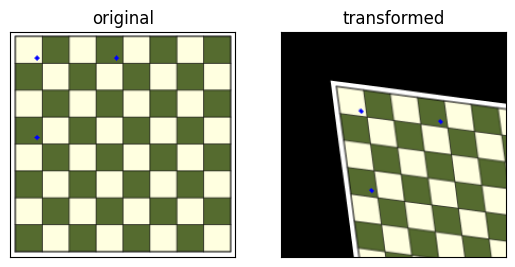

In [6]:
img = cv.imread("images/chessboard.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_copy = img.copy()

h, w = img.shape[:2]

p0 = np.float32([[25, 25], [100, 25], [25, 100]])
p1 = np.float32([[75, 75], [150, 85], [85, 150]])

# draw points p0 on the original image
for pt in p0:
    cv.circle(img, (int(pt[0]), int(pt[1])), 2, (0, 0, 255), -1)
    
M = cv.getAffineTransform(p0, p1)

dst = cv.warpAffine(img, M, (w, h))

plt.subplot(121), plt_img(img, "original")
plt.subplot(122), plt_img(dst, "transformed")
plt.show()

In [7]:
# To verify whether its 75 x 75
dst[75, 75, :] 

array([  0,   0, 255], dtype=uint8)

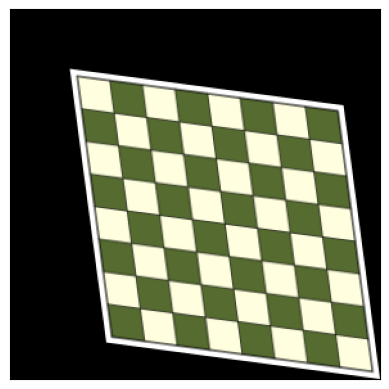

In [8]:
# Get back the lost chessboard print
dst_new = cv.warpAffine(img_copy, M, (w+75, h+75))

plt_img(dst_new)

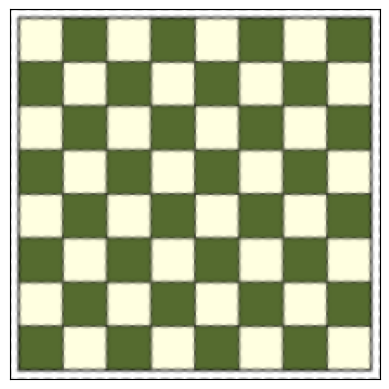

In [9]:
M_inverse = cv.getAffineTransform(p1, p0)

img_restored = cv.warpAffine(dst_new, M_inverse, (w, h))
# img_restored = cv.warpAffine(dst, M_inverse, (w, h)) > get different output!

plt_img(img_restored)

## Perspective Transformation

In [10]:
img = cv.imread("images/name_card_sample.webp")
show_img("name_card", img)

In [18]:
# how to get the corner of the picture?

p = []
img_copy = img.copy()

def mouse(event, x,y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print((x, y))
        p.append((x, y))
        cv.circle(img, (x, y), 2, (0, 0, 255), -1)
        cv.imshow("img", img)
        
cv.imshow("img", img)
cv.setMouseCallback("img", mouse)
cv.waitKey(0)
cv.destroyAllWindows()

In [19]:
!pip install scipy


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
from scipy.spatial.distance import euclidean

In [21]:
w1 = euclidean(p[0], p[1])
w2 = euclidean(p[3], p[2])

h1 = euclidean(p[0], p[3])
h2 = euclidean(p[1], p[2])

H = max(h1, h2)
W = max(w1, w2)

p_arr = np.float32(p)
dst = np.float32([[0, 0], [W-1, 0], [W-1, H-1], [0, H-1]])

M = cv.getPerspectiveTransform(p_arr, dst)
warp = cv.warpPerspective(img_copy, M, (int(W), int(H)))

cv.namedWindow("original", cv.WINDOW_NORMAL)
cv.imshow("original", img_copy)
show_img("warp", warp)

IndexError: list index out of range

## Exercise

In [22]:
img = cv.imread("images/dice.jfif")

p=[]
img_copy = img.copy()

def mouse(event, x,y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print((x, y))
        p.append((x, y))
        cv.circle(img, (x, y), 2, (0, 0, 255), -1)
        cv.imshow("img", img)
        
cv.imshow("img", img)
cv.setMouseCallback("img", mouse)
cv.waitKey(0)
cv.destroyAllWindows()

w1 = euclidean(p[0], p[1])
w2 = euclidean(p[3], p[2])

h1 = euclidean(p[0], p[3])
h2 = euclidean(p[1], p[2])

H = max(h1, h2)
W = max(w1, w2)

p_arr = np.float32(p)
dst = np.float32([[0, 0], [W-1, 0], [W-1, H-1], [0, H-1]])

M = cv.getPerspectiveTransform(p_arr, dst)
warp = cv.warpPerspective(img_copy, M, (int(W), int(H)))

cv.namedWindow("original", cv.WINDOW_NORMAL)
cv.imshow("original", img_copy)
show_img("warp", warp)

(16, 70)
(69, 98)
(73, 138)
(14, 110)


## Drawing functions

In [23]:
img = cv.imread("images/dog.jfif")

img.shape

(168, 300, 3)

In [24]:
# line
img_copy = img.copy()
cv.line(img_copy, (30, 80), (100, 150), (0, 0, 255), 4, cv.LINE_AA)
show_img("line", img_copy)

In [25]:
# circle
img_copy = img.copy()
cv.circle(img_copy, (145, 50), 40, (100, 50, 255), 4, cv.LINE_AA)
show_img("circle", img_copy)

In [26]:
# ellipse
img_copy = img.copy()
axes = (50, 25)
angle = 0

cv.ellipse(img_copy, (145, 50), axes, angle, 0, 360, (0, 0, 255), 4, cv.LINE_AA)
# cv.ellipse(img_copy, (145, 50), axes, angle, 0, 180, (0, 0, 255), 4, cv.LINE_AA)

show_img("ellipse", img_copy)

In [27]:
# rectangle
img_copy = img.copy()
cv.rectangle(img_copy, (30, 80), (100, 50), (0, 0, 255), 2, cv.LINE_8)
show_img("rectangle", img_copy)

In [28]:
# text
img_copy = img.copy()
cv.putText(img_copy, "I am a cute dog!", (15, 145), cv.FONT_HERSHEY_SIMPLEX, 0.65, 
           (255, 0, 10), 2)
show_img("text", img_copy)

##  Create a drawing template
Introduce some high level GUI provided by OpenCV

In [29]:
WHITE = (255, 255, 255)
BLUE = (255, 0, 0)
GREEN = (0, 255, 0)
RED = (0, 0, 255)

CYAN = (255, 255, 0)
MAGENTA = (255, 0, 255)
YELLOW = (0, 255, 255)

colors = (BLUE, GREEN, RED, CYAN, MAGENTA, YELLOW, WHITE)

# define a trackbar function, mouseclick callback function and set up a while loop
# to display the drawing board

def nothing(x):
    pass

p0 = p1 = (0, 0)

def mouse(event, x, y, flags, params):
    global p0, p1
    if event == cv.EVENT_LBUTTONDOWN:
        p0 = (x, y)
        
    elif event == cv.EVENT_LBUTTONUP:
        p1 = (x, y)
        
        d = cv.getTrackbarPos(tr1_name, wn)
        if d == 0:
            d=-1
        i = cv.getTrackbarPos(tr2_name, wn)
        color = colors[i]
        cv.rectangle(img, p0, p1, color, d)
        cv.imshow(wn, img)
        
wn = "window"
tr1_name = "thickness"
tr2_name = "color"

cv.namedWindow(wn)
img = np.zeros((400, 400, 3), dtype=np.uint8)
cv.createTrackbar(tr1_name, wn, 0, 10, nothing)
cv.createTrackbar(tr2_name, wn, 0, 6, nothing)
cv.setMouseCallback(wn, mouse)

while(1):
    cv.imshow(wn, img)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
    
    if k == ord('c'):
        img[:] = 0
        
cv.destroyAllWindows()

## Exercise: Drawing functions
Draw a bulleye image

In [30]:
img = np.zeros((400, 400), np.uint8)

yc, xc = img.shape[0] // 2, img.shape[1] // 2

radius = np.arange(20, 200, 15)

for r in radius:
    cv.circle(img, (xc, yc), r, 255, 2)
    
cv.putText(img, "Bulleye", (15, 385), cv.FONT_HERSHEY_SIMPLEX, 0.6, 255, 2)

show_img("bulleye", img)

## Bitwise Operation

In [35]:
# AND 
# binary images
rect = np.zeros((400, 400), np.uint8)
rect[30:370, 30:370] = 255

circle = np.zeros((400, 400), np.uint8)
cv.circle(circle, (200, 200), 200, 255, -1)

cv.imshow("rectangle", rect)
cv.imshow("circle", circle)

In [36]:
res_AND = cv.bitwise_and(rect, circle)
show_img("AND", res_AND)

In [37]:
res_OR = cv.bitwise_or(rect, circle)
show_img("OR", res_OR)

In [38]:
res_XOR = cv.bitwise_xor(rect, circle)
show_img("XOR", res_XOR)

In [39]:
# not
res_NOT = cv.bitwise_not(rect)
show_img("NOT", res_NOT)

In [40]:
# useful for masking
img = cv.imread("images/dog.jfif")

h, w = img.shape[:2]
mask = np.zeros((h, w), np.uint8)

cv.circle(mask, (145, 50), 40, 255, -1)

face = cv.bitwise_and(img, img, mask=mask)

show_img("face", face)

## Convolutions

In [41]:
# identity kernel
kernel = np.zeros((3, 3))
kernel[1, 1] = 1

print(kernel)

[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


In [42]:
img = cv.imread("images/dog.jfif")

dst = cv.filter2D(img, -1, kernel)

show_img("identity", dst)

In [43]:
# smoothing kernel
kernel = np.ones((5, 5)) / 25

blur = cv.filter2D(img, -1, kernel)

cv.imshow("original", img)
cv.imshow("blur", blur)

In [ ]:
# use built-in function
blur_1 = cv.blur(img, (5, 5))

cv.imshow("filter2D", blur)
show_img("built-in", blur_1)

In [44]:
# sharpening
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

sharpen = cv.filter2D(img, -1, kernel)

show_img("sharpen", sharpen)

In [45]:
# unsharp masking
dst = cv.addWeighted(img, 1.6, blur, -0.6, 0)

show_img("unsharp masking", dst)

# Weekly Activity

## 1.

In [47]:
!pip install imutils

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25854 sha256=66d9516a0c16ff13f3374b72f45368891db9ed4e9d428f693d0f39f160dd8c3a
  Stored in directory: c:\users\liong\appdata\local\pip\cache\wheels\4b\a5\2d\4a070a801d3a3d93f033d3ee9728f470f514826e89952df3ea
Successfully built imutils



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
import cv2 as cv
import imutils as imt
from util_func import *

img = cv.imread("images/lena.jfif")

# Rotate the image by 45 degrees using imutils
rotated_img = imt.rotate_bound(img, 45)

# Display the rotated image
cv.imshow("Rotated Image", rotated_img)
cv.waitKey(0)
cv.destroyAllWindows()

# 2.

In [51]:
import cv2 as cv

# Load the images
flower = cv.imread("images/flower.jfif")
bee = cv.imread("images/native-bee.png")

# Resize the flower image to fit the bee image
flower = cv.resize(flower, (bee.shape[1], bee.shape[0]))

# Convert the flower image to grayscale
flower_gray = cv.cvtColor(flower, cv.COLOR_BGR2GRAY)

# Threshold the flower image to create a binary mask
_, mask = cv.threshold(flower_gray, 1, 255, cv.THRESH_BINARY)

# Invert the mask
mask_inv = cv.bitwise_not(mask)

# Extract the region of interest (ROI) from the bee image using the mask
roi = cv.bitwise_and(bee, bee, mask=mask_inv)

# Extract the flower region from the resized flower image using the mask
flower_roi = cv.bitwise_and(flower, flower, mask=mask)

# Combine the ROI of the bee and the flower region
result_img = cv.add(roi, flower_roi)

# Display the result
cv.imshow("flower_bee", result_img)
cv.waitKey(0)
cv.destroyAllWindows()

## 3.

In [54]:
import cv2
import numpy as np

def apply_custom_sharpening_kernel(image_path, kernel_size, kernel_matrix):
    # Load the image
    image = cv2.imread(image_path)

    # Create the custom kernel
    kernel = np.array(kernel_matrix)

    # Apply the convolution operation
    sharpened_image = cv2.filter2D(image, -1, kernel)

    # Display the original and sharpened images side by side
    stacked_images = np.hstack((image, sharpened_image))
    cv2.imshow("Original vs Sharpened", stacked_images)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Input image path
image_path = "images/native-bee.png"

# Custom sharpening kernels
kernel_3x3 = [
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
]

kernel_5x5 = [
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, 25, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1]
]

# Apply custom sharpening kernels
apply_custom_sharpening_kernel(image_path, 3, kernel_3x3)
apply_custom_sharpening_kernel(image_path, 5, kernel_5x5)

Applying the 3x3 kernel enhances the edges and details of the image, making it sharper.
<br><br>
The 5x5 kernel, being more aggressive in sharpening, may lead to more pronounced edge artifacts and noise amplification, which might not always be desirable for all types of images. 

## 4. 

In [55]:
import cv2
import numpy as np

def apply_smoothing_techniques(image_path):
    # Load the noisy image
    image = cv2.imread(image_path)

    # Apply average filter (blur)
    average_filtered = cv2.blur(image, (5, 5))

    # Apply Gaussian blur
    gaussian_filtered = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply median filter
    median_filtered = cv2.medianBlur(image, 5)

    # Display the original and filtered images side by side
    stacked_images = np.hstack((image, average_filtered, gaussian_filtered, median_filtered))
    cv2.imshow("Original vs Average Filter vs Gaussian Blur vs Median Filter", stacked_images)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Input image path
image_path = "images/noise_lena.jpg"

# Apply different smoothing techniques
apply_smoothing_techniques(image_path)


From the outcomes, we can deduce that the type of noise present in the image is likely "salt-and-pepper noise," as evident from the improved results obtained after applying the median filter. The average filter and Gaussian blur still leave some remnants of noise, while the median filter provides a smoother and more visually pleasing result, indicating that it effectively addresses the salt-and-pepper noise present in the image.
<br><br>
Average Filter reduces high-frequency noise and provides a general smoothing effect. However, it may blur out important details and edges. Gaussian Blur also reduces noise while preserving more details and edges compared to the average filter. The degree of smoothing is controlled by the standard deviation (sigma) parameter, set to 0 in this case for automatic calculation. Median Filter effectively removes salt-and-pepper noise, which appears as isolated bright and dark pixels in the image. The median filter preserves edges well, making it particularly suitable for such noise removal.